In [2]:
import pandas as pd
import os
from glob import glob

# Uploading CSV
data_entries = pd.read_csv('/kaggle/input/data/Data_Entry_2017.csv')
data_entries = data_entries.drop(columns=['Patient Gender', 'Patient Age', 'View Position', 'Follow-up #', 'OriginalImagePixelSpacing[x', 'y]','OriginalImage[Width', 'Height]'])

# Setting image paths in dataframe

image_paths = {os.path.basename(x): x for x in glob('../input/data/images*/images/*.png')}
data_entries['path'] = data_entries['Image Index'].map(image_paths.get)
data_entries

,Image Index,Finding Labels,Patient ID,Unnamed: 11,path
0,00000001_000.png,Cardiomegaly,1,NaN,../input/data/images_001/images/00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,NaN,../input/data/images_001/images/00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,1,NaN,../input/data/images_001/images/00000001_002.png
3,00000002_000.png,No Finding,2,NaN,../input/data/images_001/images/00000002_000.png
4,00000003_000.png,Hernia,3,NaN,../input/data/images_001/images/00000003_000.png
...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,30801,NaN,../input/data/images_012/images/00030801_001.png
112116,00030802_000.png,No Finding,30802,NaN,../input/data/images_012/images/00030802_000.png
112117,00030803_000.png,No Finding,30803,NaN,../input/data/images_012/images/00030803_000.png
112118,00030804_000.png,No Finding,30804,NaN,../input/data/images_012/images/00030804_000.png


In [3]:
# Simplifying findings column
def common_findings(findings):
    findings_list = findings.split('|')
    for i, val in enumerate(findings_list):
        if val == 'Nodule':
            findings_list[i] = 'Mass'
        elif val == 'Infiltration' or val == 'Pneumonia':
            findings_list[i] = 'Consolidation'
    findings_list = list(set(findings_list))
    final_findings = ''
    for finding in findings_list:
        final_findings += finding + '|'
    if final_findings[-1] == '|':
        final_findings = final_findings[:-1]
    return final_findings

data_entries['Finding Labels'] = data_entries['Finding Labels'].apply(common_findings)

# Columns for each finding
new_col_names = ['Mass', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pleural_Thickening', 'Cardiomegaly', 'Hernia']
for name in new_col_names:
    data_entries[name] = data_entries['Finding Labels'].map(lambda result: 1.0 if name in result else 0)

data_entries

,Image Index,Finding Labels,Patient ID,Unnamed: 11,path,Mass,Consolidation,Atelectasis,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pleural_Thickening,Cardiomegaly,Hernia
0,00000001_000.png,Cardiomegaly,1,NaN,../input/data/images_001/images/00000001_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,00000001_001.png,Emphysema|Cardiomegaly,1,NaN,../input/data/images_001/images/00000001_001.png,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,00000001_002.png,Effusion|Cardiomegaly,1,NaN,../input/data/images_001/images/00000001_002.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,00000002_000.png,No Finding,2,NaN,../input/data/images_001/images/00000002_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,3,NaN,../input/data/images_001/images/00000003_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Consolidation|Mass,30801,NaN,../input/data/images_012/images/00030801_001.png,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112116,00030802_000.png,No Finding,30802,NaN,../input/data/images_012/images/00030802_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112117,00030803_000.png,No Finding,30803,NaN,../input/data/images_012/images/00030803_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112118,00030804_000.png,No Finding,30804,NaN,../input/data/images_012/images/00030804_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


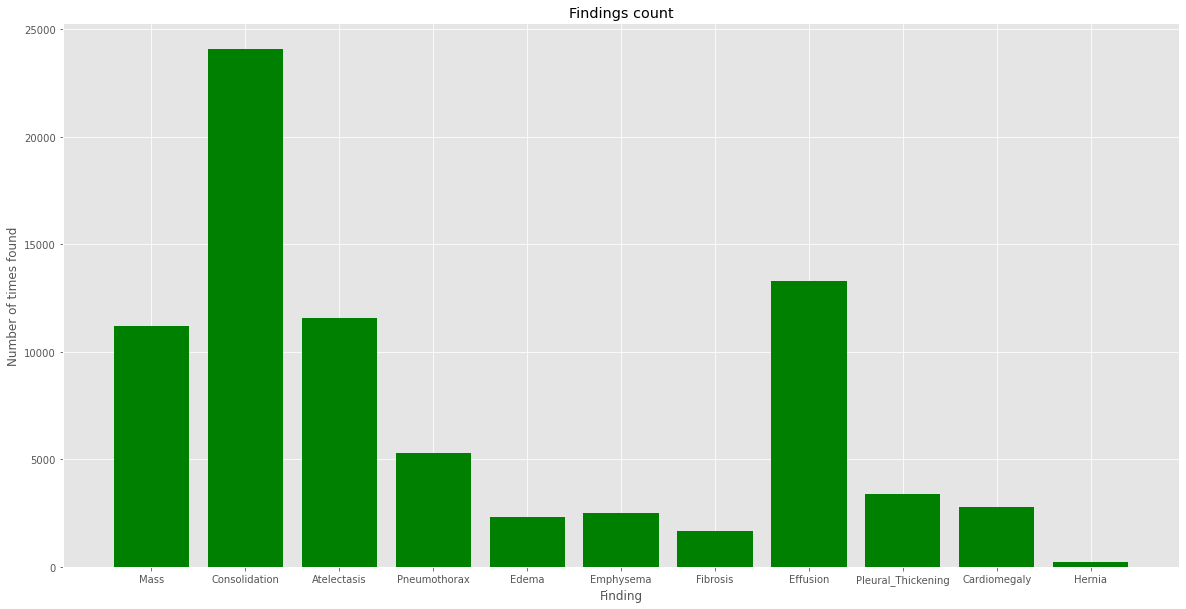

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# Checking for data imbalance
x = ['Mass', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pleural_Thickening', 'Cardiomegaly', 'Hernia']
findings_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x_pos = [i for i, _ in enumerate(x)]

def count_findings(findings):
    findings_list = findings.split('|')
    for finding in findings_list:
        for i in range(0, len(x)):
            if finding == x[i]:
                findings_count[i] += 1
                break

data_entries['Finding Labels'].apply(count_findings)

plt.bar(x_pos, findings_count, color='green')
plt.xlabel('Finding')
plt.ylabel('Number of times found')
plt.title('Findings count')
plt.xticks(x_pos, x)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

train_and_test_set, val_set = train_test_split(data_entries, train_size=0.8, test_size=0.2, random_state=1111)
train_set, test_set = train_test_split(train_and_test_set, train_size=0.75, test_size=0.25, random_state=1111)

train_and_val_set, test_set = train_test_split(data_entries, train_size=0.8, test_size=0.2, random_state=1111)

print('train and val set size: ' + str(len(train_and_val_set)))
print('training set size: ' + str(len(train_set)))
print('validation set size: ' + str(len(val_set)))
print('test set size: ' + str(len(test_set)))

train and val set size: 89696
training set size: 67272
validation set size: 22424
test set size: 22424


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Image pre-processing
data_generator = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=False,
        validation_split=0.25)

# Creating generators
image_size = (256, 256)
x = ['Mass', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pleural_Thickening', 'Cardiomegaly', 'Hernia']


train_generator = data_generator.flow_from_dataframe(
    dataframe=train_and_val_set,
    directory=None,
    x_col='path',
    y_col=x,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    seed=1111,
    subset='training')

validation_generator = data_generator.flow_from_dataframe(
    dataframe=train_and_val_set,
    directory=None,
    x_col='path',
    y_col=x,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='raw',
    batch_size=256,
    seed=1111,
    subset='validation')

test_gen = data_generator.flow_from_dataframe(
    dataframe=test_set,
    directory=None,
    x_col='path',
    y_col=x,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='raw',
    batch_size=128,
    seed=1111,
)

Found 67272 validated image filenames.
Found 22424 validated image filenames.
Found 22424 validated image filenames.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 96)        11712     
_________________________________________________________________
activation_9 (Activation)    (None, 62, 62, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 256)       2973952   
_________________________________________________________________
activation_10 (Activation)   (None, 21, 21, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 384)        

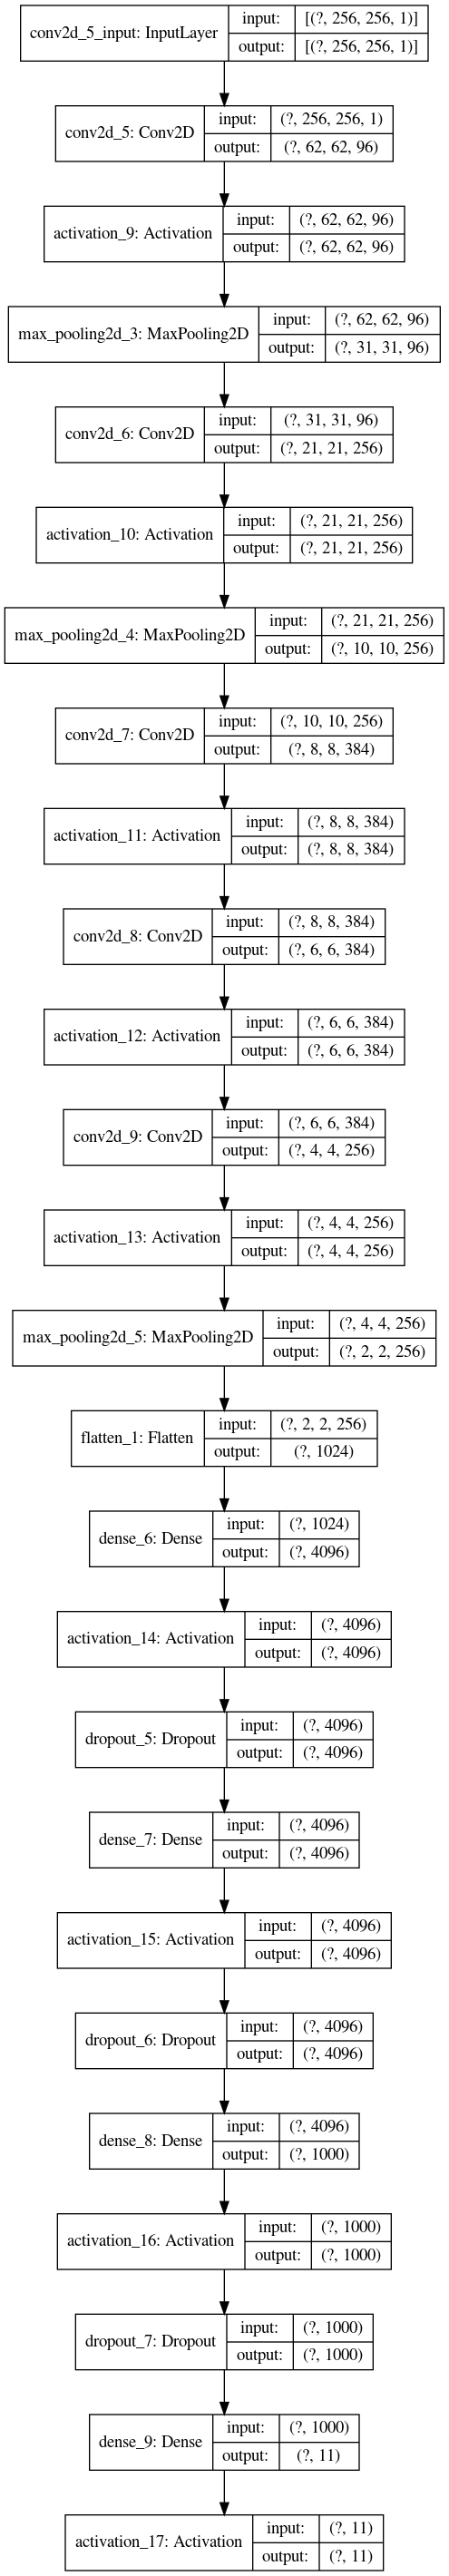

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model

model = Sequential()

# AlexNet
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(256,256,1), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1),padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())

model.add(Dense(4096, input_shape=(512*512,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(11))
model.add(Activation('sigmoid'))

sgd = SGD(learning_rate=0.01)
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='./model_plot.png', show_shapes=True, show_layer_names=True)


In [13]:
from tensorflow.keras.applications.mobilenet import MobileNet
simple_model = Sequential()
base_mobilenet_model = MobileNet(input_shape =  (256, 256, 1), 
                                 include_top = False, weights = None)
simple_model.add(base_mobilenet_model)
simple_model.add(GlobalAveragePooling2D())
simple_model.add(Dropout(0.5))
simple_model.add(Dense(512))
simple_model.add(Dropout(0.5))
simple_model.add(Dense(11, activation = 'sigmoid'))
simple_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy', 'mae'])
simple_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_256 (Function (None, 8, 8, 1024)        3228288   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 11)                5643      
Total params: 3,758,731
Trainable params: 3,736,843
Non-trainable params: 21,888
_______________________________________

In [14]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('xray_class')
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
callbacks_list = [checkpoint, early]

In [16]:
simple_model.fit_generator(train_generator, 
                                  steps_per_epoch=100,
                                  validation_data = validation_generator,
                                  epochs = 5,
                                  callbacks = callbacks_list,
                          verbose=1)

Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 0.2130 - binary_accuracy: 0.9374 - mae: 0.1089
Epoch 00001: val_loss did not improve from 0.20987
100/100 [==============================] - 467s 5s/step - loss: 0.2130 - binary_accuracy: 0.9374 - mae: 0.1089 - val_loss: 0.2396 - val_binary_accuracy: 0.9367 - val_mae: 0.0805
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.2156 - binary_accuracy: 0.9356 - mae: 0.1123
Epoch 00002: val_loss did not improve from 0.20987
100/100 [==============================] - 442s 4s/step - loss: 0.2156 - binary_accuracy: 0.9356 - mae: 0.1123 - val_loss: 0.2619 - val_binary_accuracy: 0.9367 - val_mae: 0.0755
Epoch 3/5
100/100 [==============================] - ETA: 0s - loss: 0.2143 - binary_accuracy: 0.9351 - mae: 0.1137
Epoch 00003: val_loss did not improve from 0.20987
100/100 [==============================] - 436s 4s/step - loss: 0.2143 - binary_accuracy: 0.9351 - mae: 0.1137 - val_loss: 0.3046 - val_binary_

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# model.fit_generator(generator=train_generator,
#                    steps_per_epoch=67272//256,
#                    validation_data=validation_generator,
#                    validation_steps=22424//256,
#                    epochs=100)
# #                    callbacks=[early_stopping])

In [ ]:
# predict = model.predict_generator(test_gen,steps = 30, verbose=1)

In [ ]:
simple_model.save("simple_model")

In [ ]:
# reconstructed_model = keras.models.load_model("my_model")